In [1]:
%matplotlib notebook
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from distiller import *

<IPython.core.display.Javascript object>


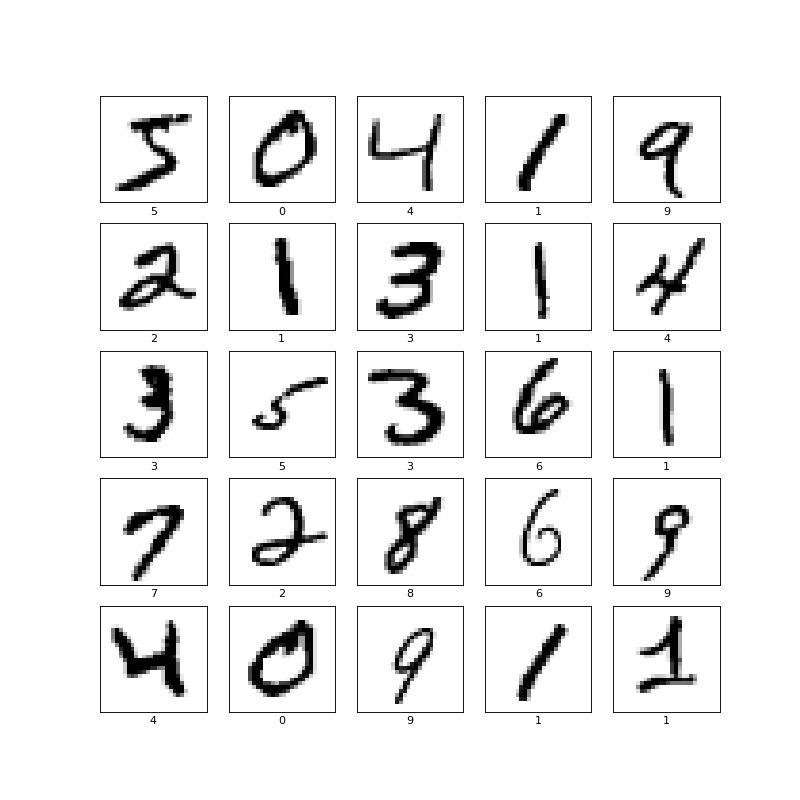

(10000, 28, 28, 1)


In [2]:
tf.keras.backend.clear_session()
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[:10000, :, :]
y_train = y_train[:10000]
x_test = x_test[:3000, :, :]
y_test = y_test[:3000]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(1000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [3]:
def teacherModel():
    teacher = models.Sequential()
    teacher = models.Sequential()
    teacher.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    teacher.add(layers.MaxPooling2D((2, 2)))
    teacher.add(layers.Conv2D(32, (3, 3), activation='relu'))
    teacher.add(layers.MaxPooling2D((2, 2)))
    teacher.add(layers.Flatten())
    teacher.add(layers.Dense(56, activation='relu'))
    # teacher.add(layers.Dropout(rate=0.2))
    teacher.add(layers.Dense(56, activation='relu'))
    # teacher.add(layers.Dropout(rate=0.2))
    teacher.add(layers.Dense(56, activation='relu'))
    # teacher.add(layers.Dropout(rate=0.2))
    teacher.add(layers.Dense(56, activation='relu'))
    teacher.add(layers.Dense(10, name='teacher_logits'))
    
    # teacher.compile(optimizer='adam',
    #           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #           metrics=['accuracy'])
    return teacher

In [4]:
teacher = teacherModel()
print(teacher.summary())
# dis = Distiller(teacher, models.clone_model(teacher), x_train, y_train, x_test, y_test, task_balance=0.8)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 56)                44856     
_________________________________________________________________
dense_1 (Dense)              (None, 56)               

In [37]:
# dis.trainTeacher()

training teacher network...

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Train Loss: 1.2524582147598267, Train Accuracy: 56.36666488647461, Test Loss: 0.5875949263572693, Test Accuracy: 81.80999755859375
Epoch 2, Train Loss: 0.37905365228652954, Train Accuracy: 87.23333740234375, Test Loss: 0.38045984506607056, Test Accuracy: 88.13999938964844
Epoch 3, Train Loss: 0.23250247538089752, Train Accuracy: 92.4000015258789, Test Loss: 0.29701292514801025, Test Accuracy: 91.37999725341797
Epoch 4, Train Loss: 0.1552118957042694, Train Accuracy: 

In [ ]:
# dis.getTeacherTargets()

fetching soft targets set by teacher network...


In [ ]:
# dis.teachStudent()